# Machine Learning

## TME 04 - Perceptron

**Ben Kabongo**, M1 DAC, *21116436*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tme4 import *
from mltools import plot_data, gen_arti

In [2]:
def plot_frontiere(X, y, p, step=1_000):
    mmax = X.max(0)
    mmin = X.min(0)
    x1grid, x2grid = np.meshgrid(np.linspace(mmin[0],mmax[0],step),np.linspace(mmin[1],mmax[1],step))
    grid = np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))
    res = p.predict(grid)
    res = res.reshape(x1grid.shape)
    plt.contourf(x1grid,x2grid,res,colors=["darksalmon","skyblue"],levels=[-1000,0,1000])

### Perceptron et classe Lineaire

```
class Lineaire(object):
    def __init__(self,
                loss=perceptron_loss,
                loss_g=perceptron_grad,
                max_iter=100,               # epochs
                eps=1e-2,                   # learning rate
                projection=None,            # fonction de projection
                projection_args={},         # projection args, if proj_gauss
                penalty=False,              # penalty : False -> None, True -> L2
                penalty_alpha=0,            # penalty alpha
                penalty_lambda=1e-2,        # penalty coef
                gradient_mode=GradientDescentMode.BATCH,
                batch_size=100,              # batch size if Mini batch
                initialization_mode=InitializationMode.RANDOM
                ):
```

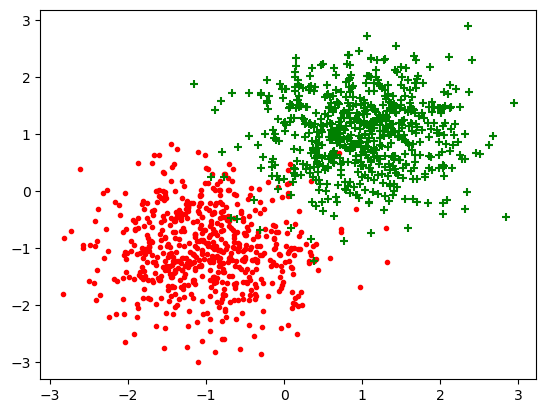

In [3]:
# données aléatoires
X, y = gen_arti(nbex=1250, data_type=0, epsilon=0.6)
plot_data(X, y)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [5]:
p = Lineaire(max_iter=100)
p.fit(X_train, y_train, X_test, y_test)

In [6]:
p.w

array([[0.00466564],
       [0.00520427]])

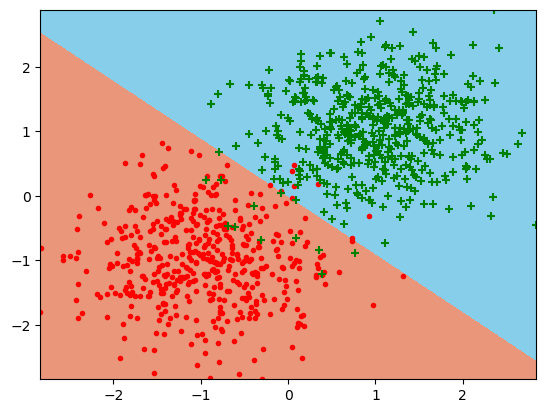

In [7]:
# frontière de décision
plot_frontiere(X_train, y_train, p, step=1000)
plot_data(X_train, y_train)

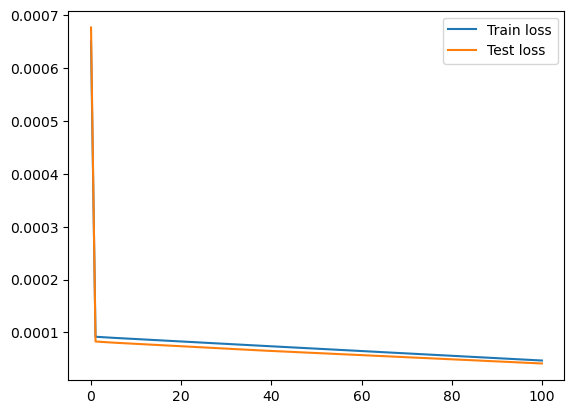

In [8]:
plt.plot(p.loss_values, label='Train loss')
plt.plot(p.loss_test_values, label='Test loss')
plt.legend()

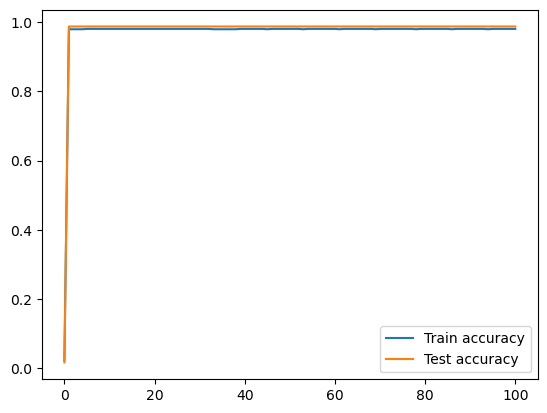

In [9]:
plt.plot(p.accuracy_values, label='Train accuracy')
plt.plot(p.accuracy_test_values, label='Test accuracy')
plt.legend()

In [10]:
print('Accuracy en train :', p.score(X_train, y_train))
print('Accuracy en test :', p.score(X_test, y_test))

Accuracy en train : 0.981
Accuracy en test : 0.988


### Données USPS

#### Classification 6 et 9

In [11]:
uspsdatatrain = "../data/USPS_train.txt"
uspsdatatest = "../data/USPS_test.txt"
alltrainx,alltrainy = load_usps(uspsdatatrain)
alltestx,alltesty = load_usps(uspsdatatest)
neg = 6
pos = 9
X_train, y_train = get_usps([neg,pos],alltrainx,alltrainy)
X_test, y_test = get_usps([neg,pos],alltestx,alltesty)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1308, 256) (1308,)
(347, 256) (347,)


In [12]:
y_train = np.where(y_train == neg, -1, 1)
y_train = y_train.reshape(-1, 1)

y_test = np.where(y_test == neg, -1, 1)
y_test = y_test.reshape(-1, 1)

print(y_train.shape, y_test.shape)

(1308, 1) (347, 1)


In [13]:
def load_neg_pos(neg, pos):
    X_train, y_train = get_usps([neg,pos],alltrainx,alltrainy)
    X_test, y_test = get_usps([neg,pos],alltestx,alltesty)
    y_train = np.where(y_train == neg, -1, 1)
    y_train = y_train.reshape(-1, 1)
    y_test = np.where(y_test == neg, -1, 1)
    y_test = y_test.reshape(-1, 1)
    return X_train, X_test, y_train, y_test

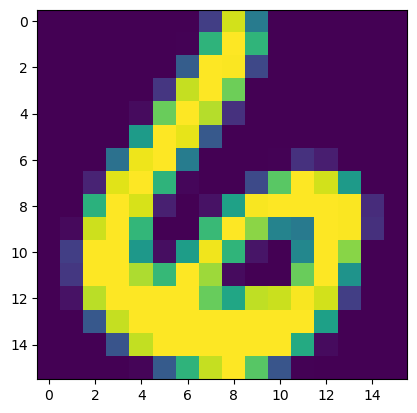

In [14]:
show_usps(X_train[0])

In [15]:
p = Lineaire(max_iter=1_000, eps=1e-5, initialization_mode=InitializationMode.ONE)
p.fit(X_train, y_train, X_test, y_test)

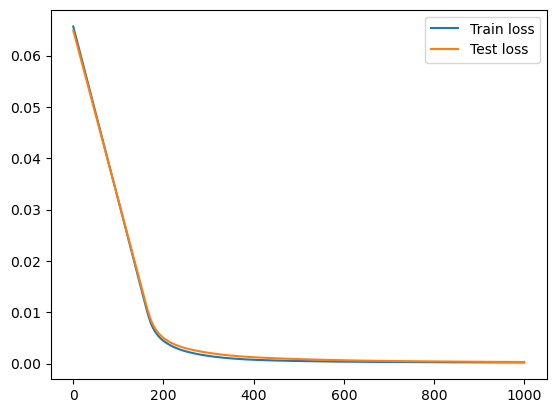

In [16]:
plt.plot(p.loss_values, label='Train loss')
plt.plot(p.loss_test_values, label='Test loss')
plt.legend()

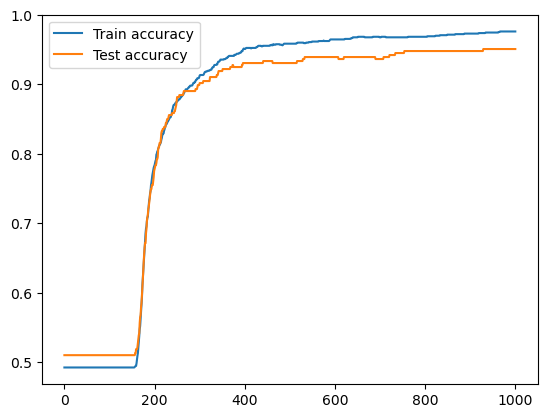

In [17]:
plt.plot(p.accuracy_values, label='Train accuracy')
plt.plot(p.accuracy_test_values, label='Test accuracy')
plt.legend()

In [18]:
print('Accuracy en train :', p.score(X_train, y_train))
print('Accuracy en test :', p.score(X_test, y_test))

Accuracy en train : 0.9762996941896025
Accuracy en test : 0.9510086455331412


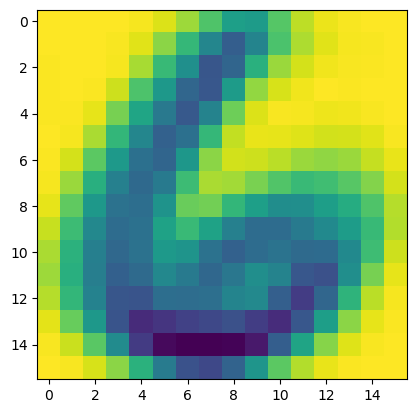

In [19]:
show_usps(p.w)

#### Une seule classe

In [20]:
X_train, y_train = get_usps(6,alltrainx,alltrainy)
X_test, y_test = get_usps(6,alltestx,alltesty)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
y_train = np.where(y_train == 6, -1, 1)
y_train = y_train.reshape(-1, 1)
y_test = np.where(y_test == 6, -1, 1)
y_test = y_test.reshape(-1, 1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(664, 256) (664, 1)
(170, 256) (170, 1)


In [21]:
p = Lineaire(max_iter=1_000, eps=1e-5, initialization_mode=InitializationMode.ONE)
p.fit(X_train, y_train, X_test, y_test)

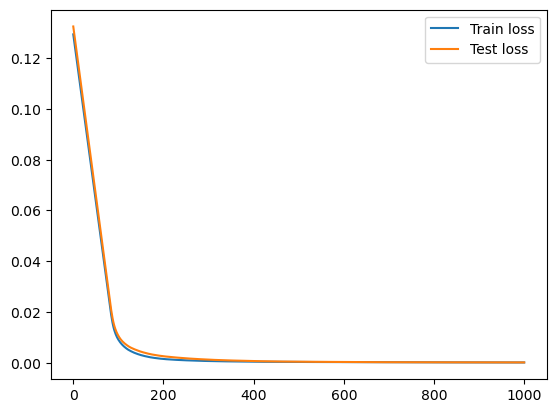

In [22]:
plt.plot(p.loss_values, label='Train loss')
plt.plot(p.loss_test_values, label='Test loss')
plt.legend()

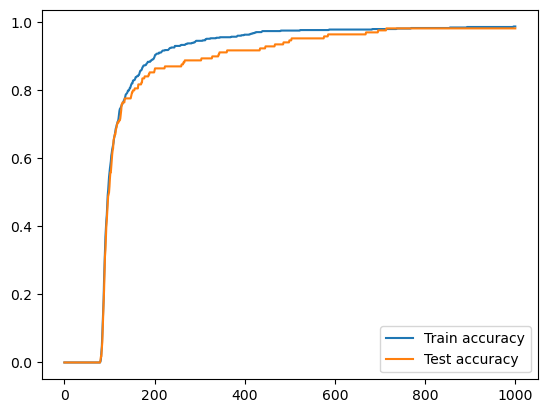

In [23]:
plt.plot(p.accuracy_values, label='Train accuracy')
plt.plot(p.accuracy_test_values, label='Test accuracy')
plt.legend()

In [24]:
print('Accuracy en train :', p.score(X_train, y_train))
print('Accuracy en test :', p.score(X_test, y_test))

Accuracy en train : 0.9879518072289156
Accuracy en test : 0.9823529411764705


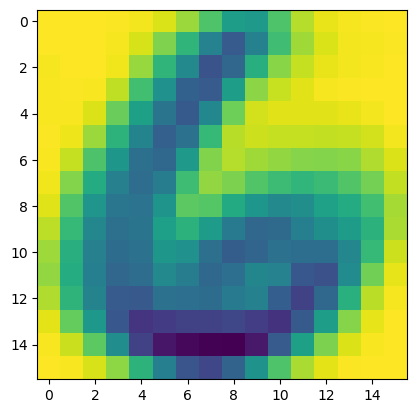

In [25]:
show_usps(p.w)

#### Surapprentissage ?

In [26]:
X_train, X_test, y_train, y_test = load_neg_pos(6, 9)

In [27]:
p = Lineaire(max_iter=1_000, eps=1e-5)
p.fit(X_train, y_train, X_test, y_test)

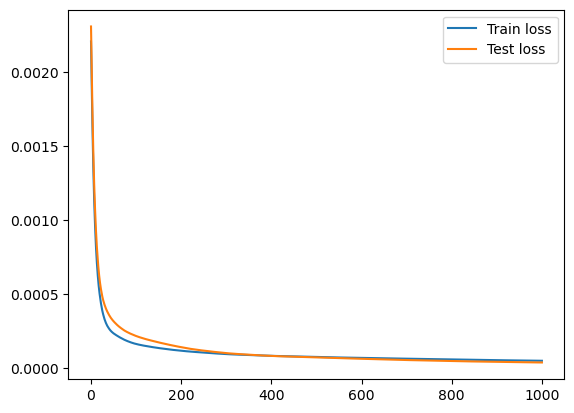

In [28]:
plt.plot(p.loss_values, label='Train loss')
plt.plot(p.loss_test_values, label='Test loss')
plt.legend()

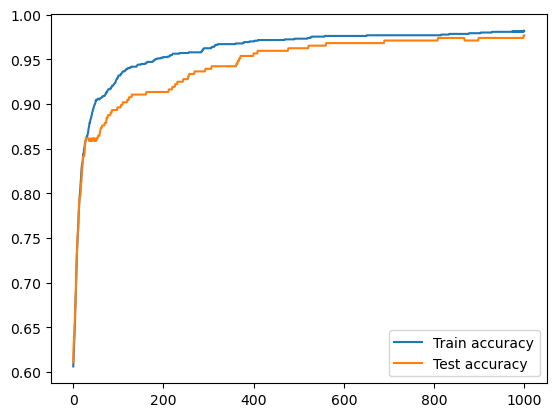

In [29]:
plt.plot(p.accuracy_values, label='Train accuracy')
plt.plot(p.accuracy_test_values, label='Test accuracy')
plt.legend()

In [30]:
print('Accuracy en train :', p.score(X_train, y_train))
print('Accuracy en test :', p.score(X_test, y_test))

Accuracy en train : 0.981651376146789
Accuracy en test : 0.9769452449567724


### Mini-batch et descente stochastique

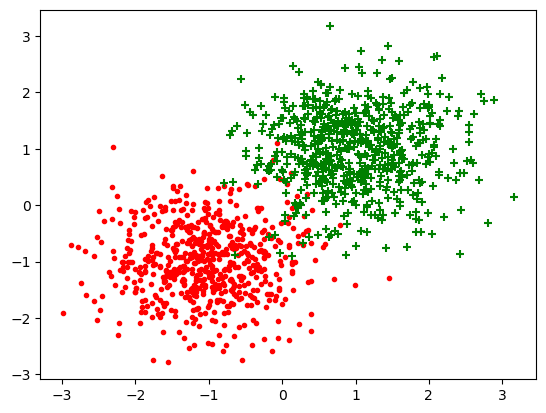

In [31]:
X, y = gen_arti(nbex=1250, data_type=0, epsilon=.6)
plot_data(X, y)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

#### Batch

In [33]:
p = Lineaire(max_iter=100, eps=1e-2, gradient_mode=GradientDescentMode.BATCH)
p.fit(X_train, y_train, X_test, y_test)

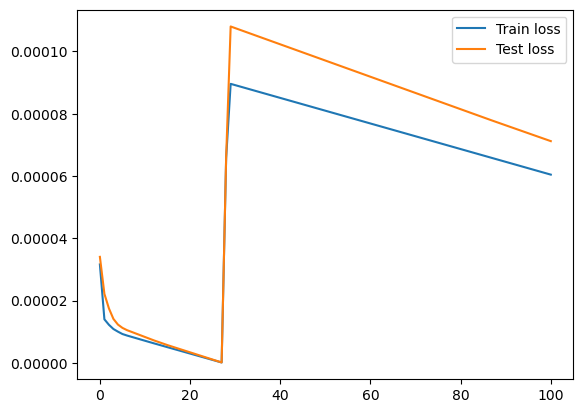

In [34]:
plt.plot(p.loss_values, label='Train loss')
plt.plot(p.loss_test_values, label='Test loss')
plt.legend()

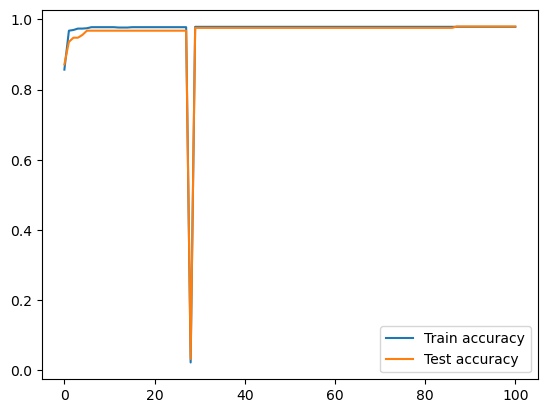

In [35]:
plt.plot(p.accuracy_values, label='Train accuracy')
plt.plot(p.accuracy_test_values, label='Test accuracy')
plt.legend()

#### Stochastique

In [36]:
p = Lineaire(max_iter=100, eps=1e-2, gradient_mode=GradientDescentMode.STOCHASTIC, batch_size=1)
p.fit(X_train, y_train, X_test, y_test)

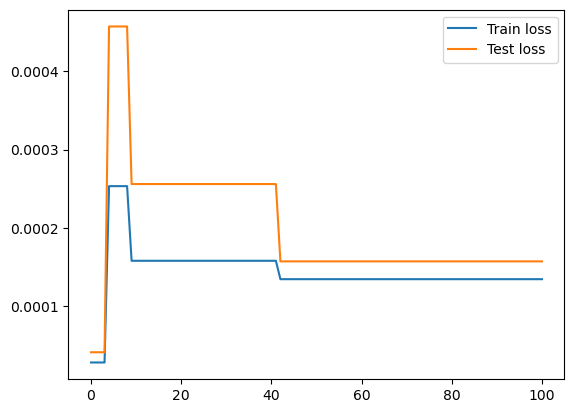

In [37]:
plt.plot(p.loss_values, label='Train loss')
plt.plot(p.loss_test_values, label='Test loss')
plt.legend()

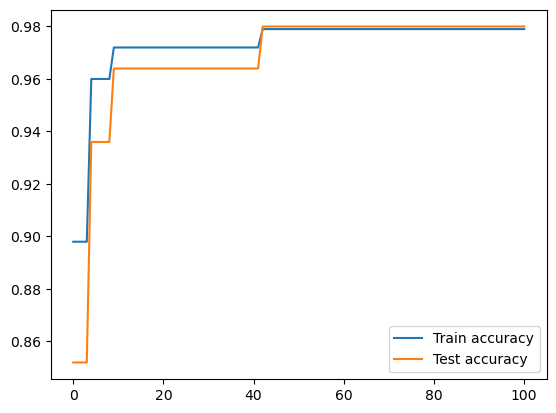

In [38]:
plt.plot(p.accuracy_values, label='Train accuracy')
plt.plot(p.accuracy_test_values, label='Test accuracy')
plt.legend()

In [39]:
print('Accuracy en train :', p.score(X_train, y_train))
print('Accuracy en test :', p.score(X_test, y_test))

Accuracy en train : 0.979
Accuracy en test : 0.98


#### Mini-batch

In [40]:
p = Lineaire(max_iter=1_000, eps=1e-2, gradient_mode=GradientDescentMode.MINI_BATCH, batch_size=100)
p.fit(X_train, y_train, X_test, y_test)

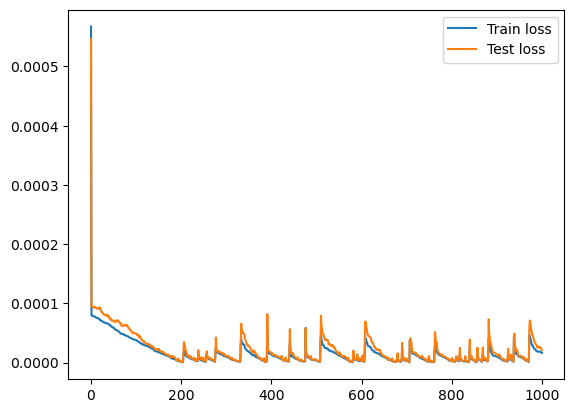

In [41]:
plt.plot(p.loss_values, label='Train loss')
plt.plot(p.loss_test_values, label='Test loss')
plt.legend()

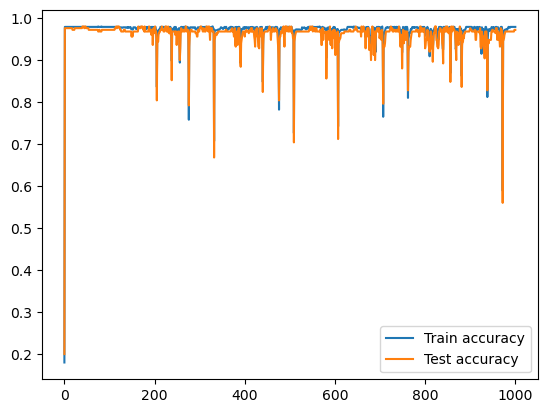

In [42]:
plt.plot(p.accuracy_values, label='Train accuracy')
plt.plot(p.accuracy_test_values, label='Test accuracy')
plt.legend()

In [43]:
print('Accuracy en train :', p.score(X_train, y_train))
print('Accuracy en test :', p.score(X_test, y_test))

Accuracy en train : 0.979
Accuracy en test : 0.972


### Projections

#### Ajout du biais : USPS

In [44]:
X_train, X_test, y_train, y_test = load_neg_pos(6, 9)

In [45]:
p = Lineaire(max_iter=1_000, eps=1e-5, projection=proj_biais)
p.fit(X_train, y_train, X_test, y_test)

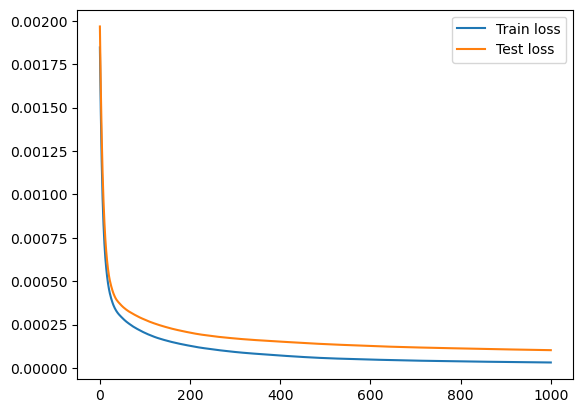

In [46]:
plt.plot(p.loss_values, label='Train loss')
plt.plot(p.loss_test_values, label='Test loss')
plt.legend()

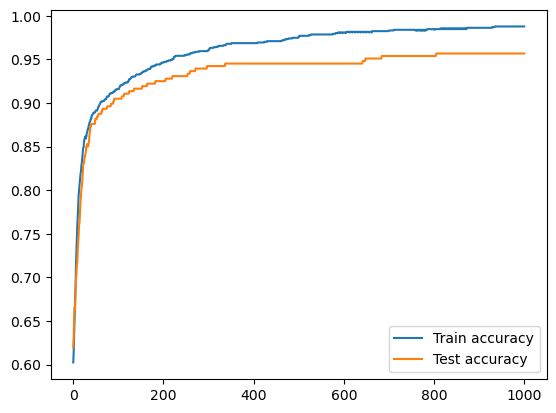

In [47]:
plt.plot(p.accuracy_values, label='Train accuracy')
plt.plot(p.accuracy_test_values, label='Test accuracy')
plt.legend()

In [48]:
print('Accuracy en train :', p.score(X_train, y_train))
print('Accuracy en test :', p.score(X_test, y_test))

Accuracy en train : 0.9877675840978594
Accuracy en test : 0.9567723342939481


#### Kernel polynomial : données non linéairement séparables

##### Données aléatoires : XOR

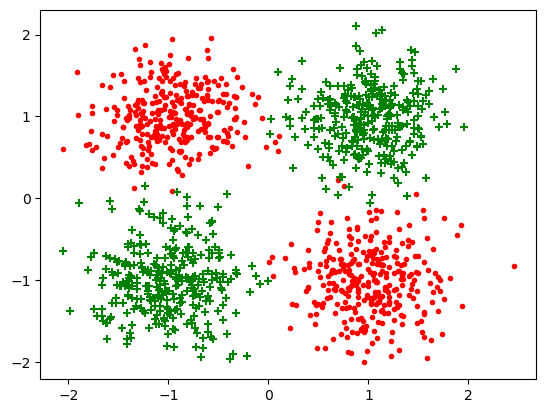

In [49]:
X, y = gen_arti(nbex=1248, data_type=1, epsilon=0.2)
plot_data(X, y)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [51]:
p = Lineaire(max_iter=1_000, eps=1e-2, projection=proj_poly)
p.fit(X_train, y_train, X_test, y_test)

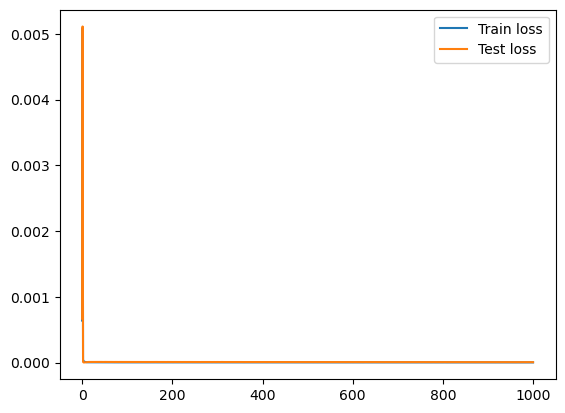

In [52]:
plt.plot(p.loss_values, label='Train loss')
plt.plot(p.loss_test_values, label='Test loss')
plt.legend()

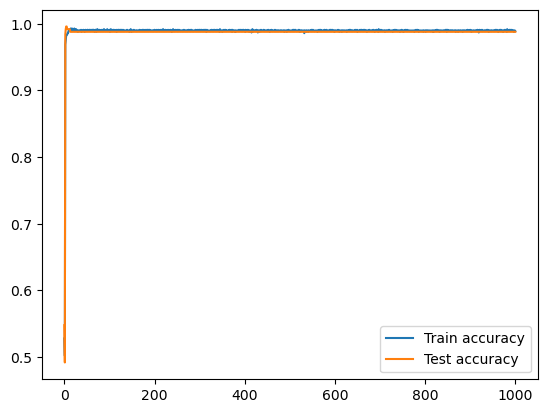

In [53]:
plt.plot(p.accuracy_values, label='Train accuracy')
plt.plot(p.accuracy_test_values, label='Test accuracy')
plt.legend()

In [54]:
print('Accuracy en train :', p.score(X_train, y_train))
print('Accuracy en test :', p.score(X_test, y_test))

Accuracy en train : 0.9889779559118237
Accuracy en test : 0.988


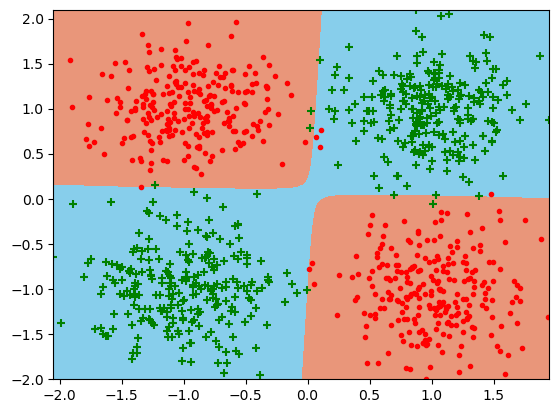

In [55]:
plot_frontiere(X_train, y_train, p)
plot_data(X_train, y_train)

##### Données aléatoires : échequier

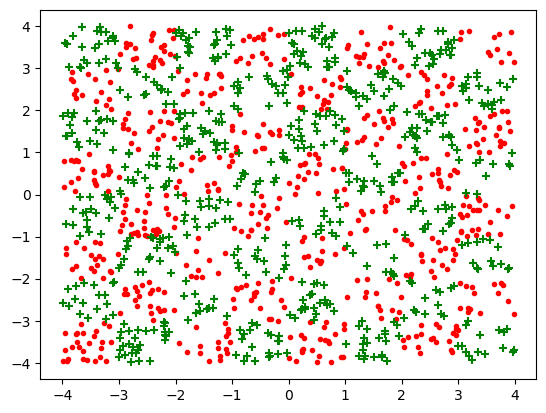

In [56]:
X, y = gen_arti(nbex=1248, data_type=2, epsilon=0)
plot_data(X, y)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [58]:
p = Lineaire(max_iter=1_000, eps=1e-2, projection=proj_poly)
p.fit(X_train, y_train, X_test, y_test)

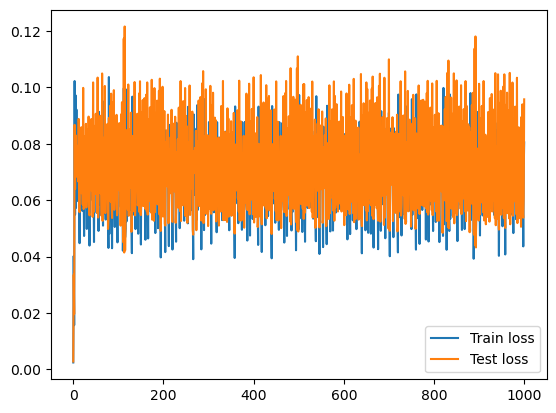

In [59]:
plt.plot(p.loss_values, label='Train loss')
plt.plot(p.loss_test_values, label='Test loss')
plt.legend()

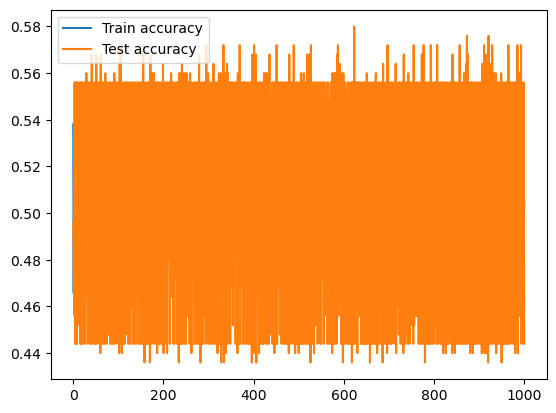

In [60]:
plt.plot(p.accuracy_values, label='Train accuracy')
plt.plot(p.accuracy_test_values, label='Test accuracy')
plt.legend()

In [61]:
print('Accuracy en train :', p.score(X_train, y_train))
print('Accuracy en test :', p.score(X_test, y_test))

Accuracy en train : 0.5050100200400801
Accuracy en test : 0.444


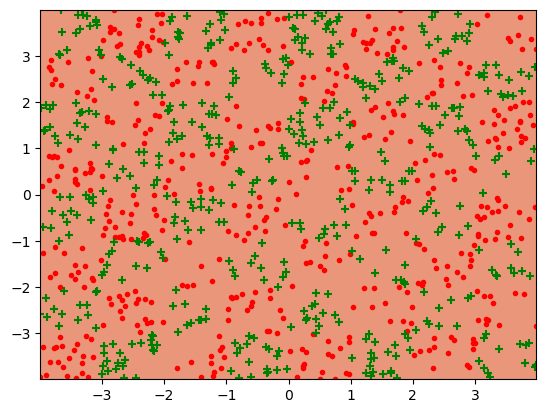

In [62]:
plot_frontiere(X_train, y_train, p)
plot_data(X_train, y_train)

### Kernel gaussian

#### Données aléatoires

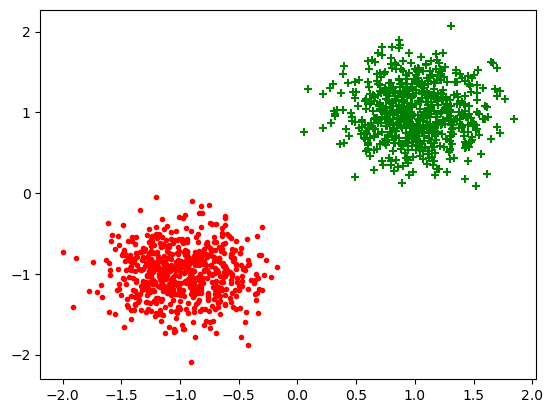

In [63]:
X, y = gen_arti(nbex=1248, data_type=0, epsilon=0.02)
plot_data(X, y)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [65]:
m = 3 # nombre de points de la base
N = len(X_train) # nombre de points du dataset
idx = np.random.choice(N, m, replace=False)
B = X_train[idx]
B

array([[-0.84265633, -1.1507471 ],
       [ 1.51993015,  0.090421  ],
       [ 1.37329823,  0.80545021]])

In [66]:
def get_random_base(X, m):
    N = len(X)
    idx = np.random.choice(N, m, replace=False)
    B = X[idx]
    return B

In [67]:
p = Lineaire(max_iter=1_000, eps=1e-2, projection=proj_gauss, projection_args={'base':B, 'sigma':0.01})
p.fit(X_train, y_train, X_test, y_test)

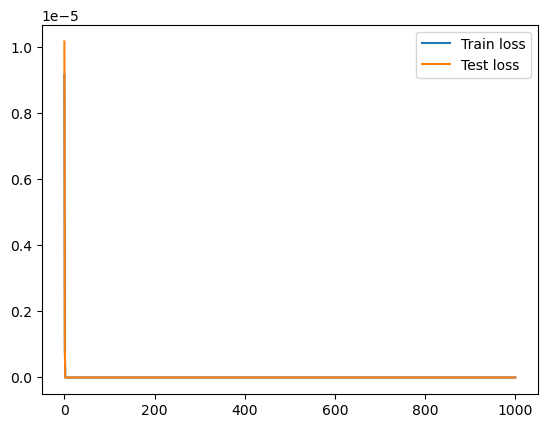

In [68]:
plt.plot(p.loss_values, label='Train loss')
plt.plot(p.loss_test_values, label='Test loss')
plt.legend()

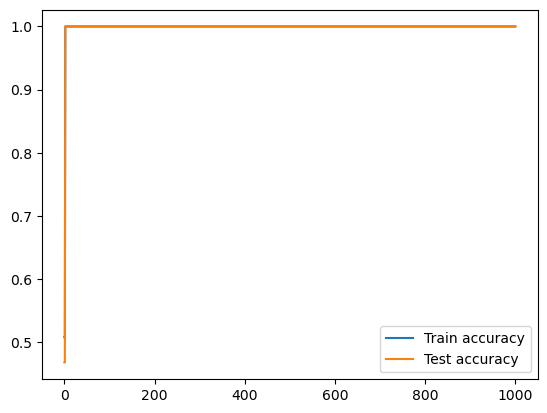

In [69]:
plt.plot(p.accuracy_values, label='Train accuracy')
plt.plot(p.accuracy_test_values, label='Test accuracy')
plt.legend()

In [70]:
print('Accuracy en train :', p.score(X_train, y_train))
print('Accuracy en test :', p.score(X_test, y_test))

Accuracy en train : 1.0
Accuracy en test : 1.0


#### Etude de l'impact de la taille de la base

Base size = 2
Accuracy en train : 1.0
Accuracy en test : 1.0
Base size = 5
Accuracy en train : 0.998997995991984
Accuracy en test : 1.0
Base size = 10
Accuracy en train : 1.0
Accuracy en test : 1.0
Base size = 20
Accuracy en train : 1.0
Accuracy en test : 1.0


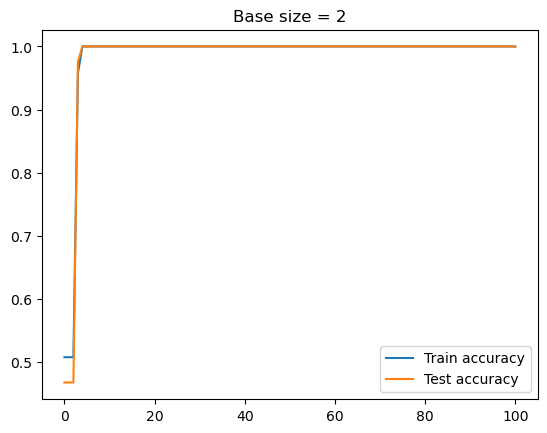

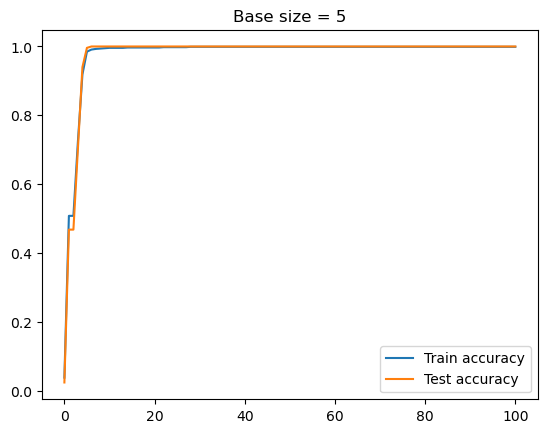

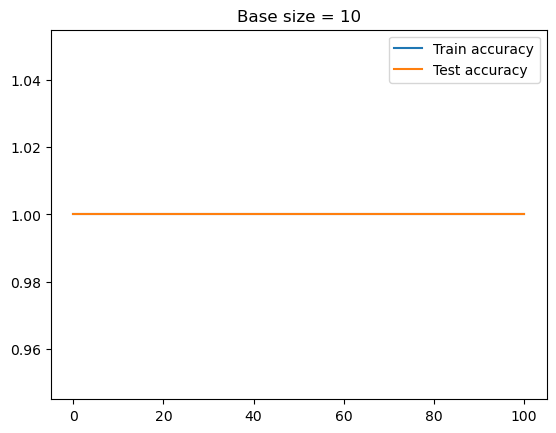

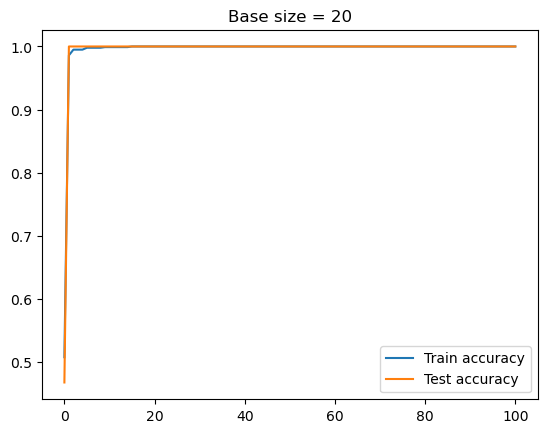

In [71]:
for m in [2, 5, 10, 20]:
    B = get_random_base(X_train, m)
    p = Lineaire(max_iter=100, eps=1e-2, projection=proj_gauss, projection_args={'base':B, 'sigma':0.01})
    p.fit(X_train, y_train, X_test, y_test)
    
    plt.figure()
    plt.title(f'Base size = {m}')
    plt.plot(p.accuracy_values, label='Train accuracy')
    plt.plot(p.accuracy_test_values, label='Test accuracy')
    plt.legend()
    
    print(f'Base size = {m}')
    print('Accuracy en train :', p.score(X_train, y_train))
    print('Accuracy en test :', p.score(X_test, y_test))

#### Etude de l'impact du sigma

Sigma = 0.001
Accuracy en train : 0.998997995991984
Accuracy en test : 0.996
Sigma = 0.01
Accuracy en train : 1.0
Accuracy en test : 1.0
Sigma = 0.1
Accuracy en train : 1.0
Accuracy en test : 1.0
Sigma = 1
Accuracy en train : 1.0
Accuracy en test : 1.0
Sigma = 10
Accuracy en train : 1.0
Accuracy en test : 1.0


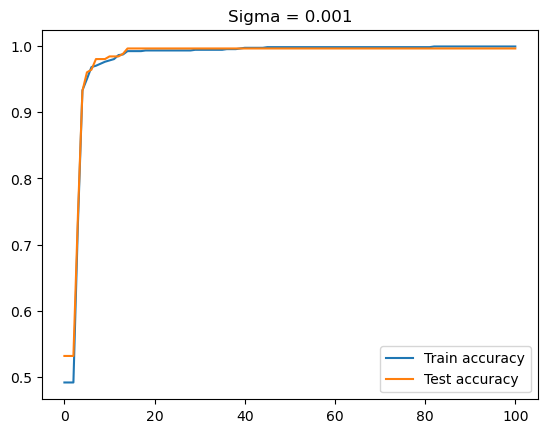

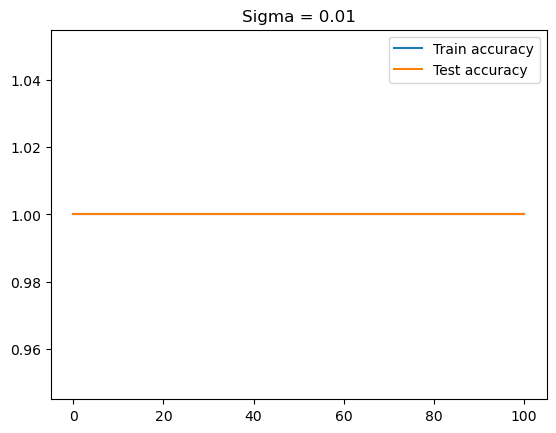

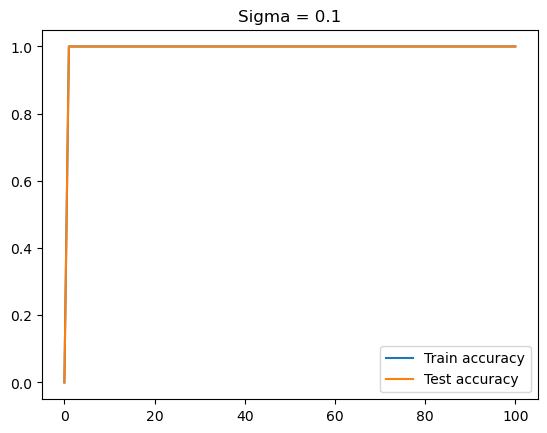

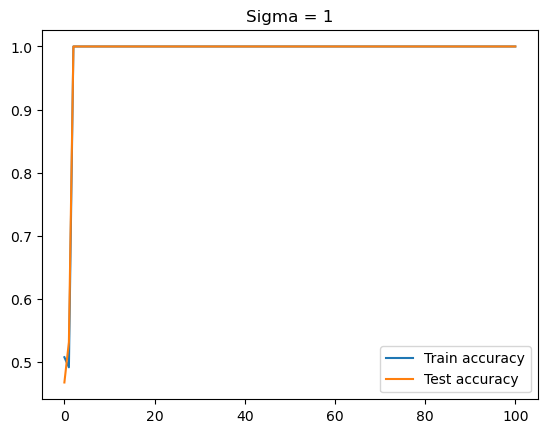

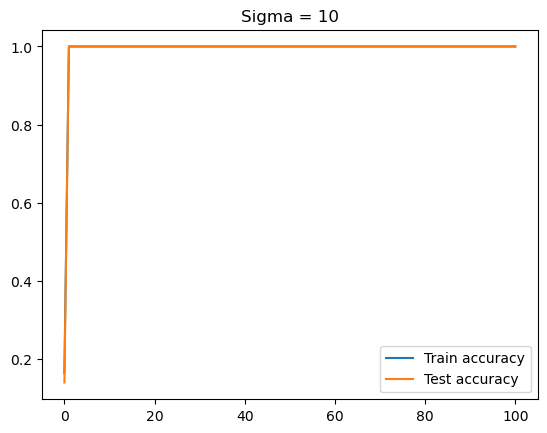

In [72]:
m = 5
B = get_random_base(X_train, m)
for sigma in [.001, .01, .1, 1, 10]:
    p = Lineaire(max_iter=100, eps=1e-2, projection=proj_gauss, projection_args={'base':B, 'sigma':sigma})
    p.fit(X_train, y_train, X_test, y_test)
    
    plt.figure()
    plt.title(f'Sigma = {sigma}')
    plt.plot(p.accuracy_values, label='Train accuracy')
    plt.plot(p.accuracy_test_values, label='Test accuracy')
    plt.legend()
    
    print(f'Sigma = {sigma}')
    print('Accuracy en train :', p.score(X_train, y_train))
    print('Accuracy en test :', p.score(X_test, y_test))

#### Représentation de la base

Accuracy en train : 1.0
Accuracy en test : 1.0


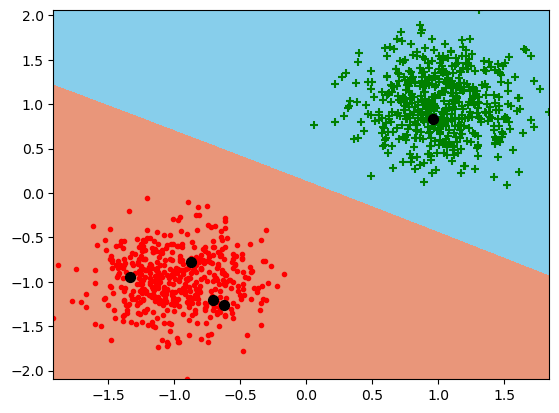

In [73]:
m = 5
B = get_random_base(X_train, m)
sigma = 0.01
p = Lineaire(max_iter=100, eps=1e-2, projection=proj_gauss, projection_args={'base':B, 'sigma':sigma})
p.fit(X_train, y_train, X_test, y_test)
print('Accuracy en train :', p.score(X_train, y_train))
print('Accuracy en test :', p.score(X_test, y_test))
plot_frontiere(X_train, y_train, p)
plot_data(X_train, y_train)
plt.scatter(B[:, 0], B[:, 1], s=50, marker='o', c='black')

Accuracy en train : 1.0
Accuracy en test : 1.0


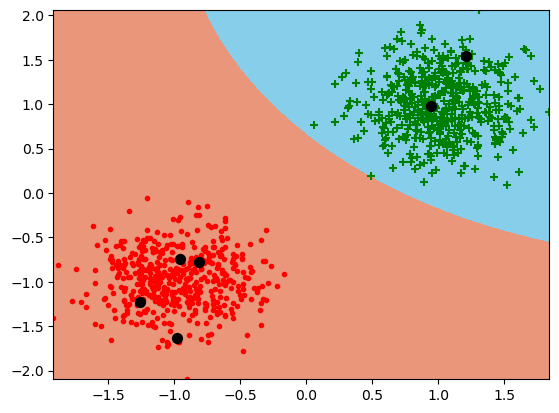

In [74]:
m = 6
B = get_random_base(X_train, m)
sigma = 0.1
p = Lineaire(max_iter=100, eps=1e-2, projection=proj_gauss, projection_args={'base':B, 'sigma':sigma})
p.fit(X_train, y_train, X_test, y_test)
print('Accuracy en train :', p.score(X_train, y_train))
print('Accuracy en test :', p.score(X_test, y_test))
plot_frontiere(X_train, y_train, p)
plot_data(X_train, y_train)
plt.scatter(B[:, 0], B[:, 1], s=50, marker='o', c='black')

In [75]:
B

array([[-0.98017423, -1.62783613],
       [-0.9550265 , -0.74236569],
       [-0.80960743, -0.78070756],
       [ 0.94442816,  0.97816961],
       [-1.25547588, -1.22956576],
       [ 1.21198875,  1.53746017]])

In [76]:
# point le plus important de cette base
B[np.argmax(p.w)]

array([-0.9550265 , -0.74236569])

#### Données aléatoires : XOR

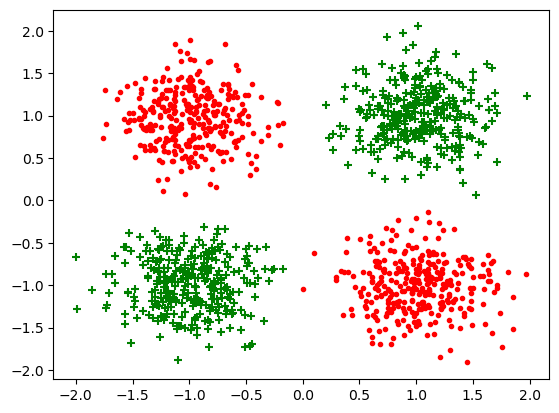

In [77]:
X, y = gen_arti(nbex=1248, data_type=1, epsilon=0)
plot_data(X, y)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [79]:
B = get_random_base(X_train, 10)
B

array([[-1.36326197, -0.89315235],
       [-0.17494836,  0.91397557],
       [ 0.38310568, -0.61077953],
       [ 0.59238429,  1.07109375],
       [-1.1527536 ,  0.72196338],
       [ 0.89467929,  0.57514417],
       [ 0.92687796, -0.52161649],
       [-1.26929244, -0.79675653],
       [-0.61746543, -1.33066115],
       [ 0.84358283,  0.70944284]])

In [80]:
p = Lineaire(max_iter=1_000, eps=1e-2, projection=proj_gauss, projection_args={'base':B, 'sigma':1})
p.fit(X_train, y_train, X_test, y_test)

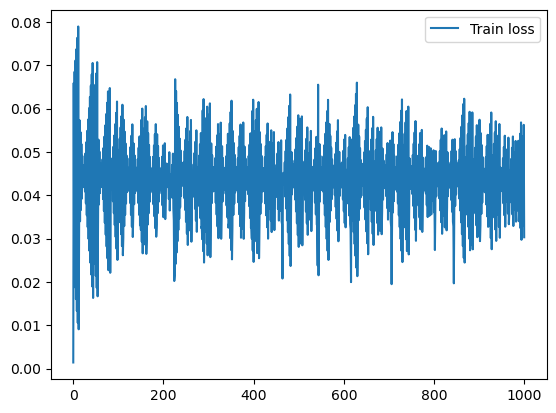

In [81]:
plt.plot(p.loss_values, label='Train loss')
plt.legend()

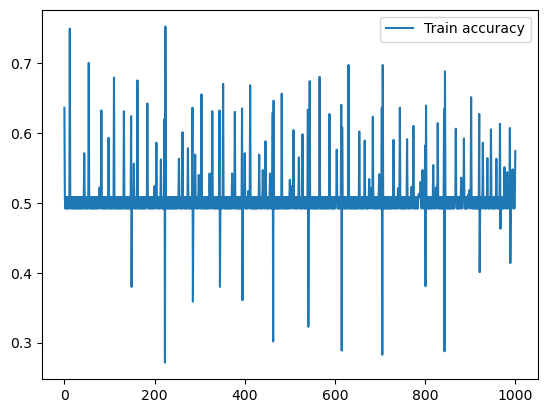

In [82]:
plt.plot(p.accuracy_values, label='Train accuracy')
plt.legend()

In [83]:
print('Accuracy en train :', p.score(X_train, y_train))
print('Accuracy en test :', p.score(X_test, y_test))

Accuracy en train : 0.5741482965931863
Accuracy en test : 0.604


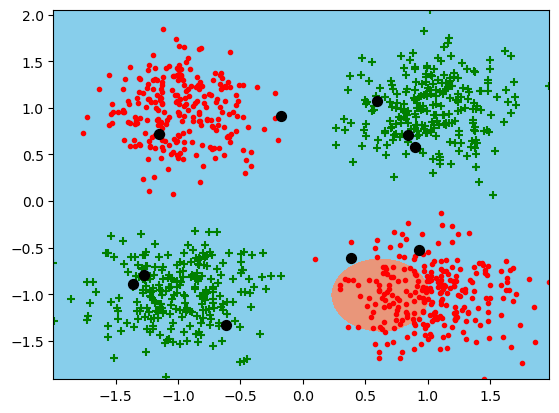

In [84]:
plot_frontiere(X_train, y_train, p)
plot_data(X_train, y_train)
plt.scatter(B[:, 0], B[:, 1], s=50, marker='o', c='black')

#### Base = centroide de clusters

In [85]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4).fit(X_train)
B = kmeans.cluster_centers_
B

array([[-0.97879439,  0.96913203],
       [ 1.02616236, -1.00253756],
       [ 1.02877687,  0.99222344],
       [-0.9964903 , -0.98519221]])

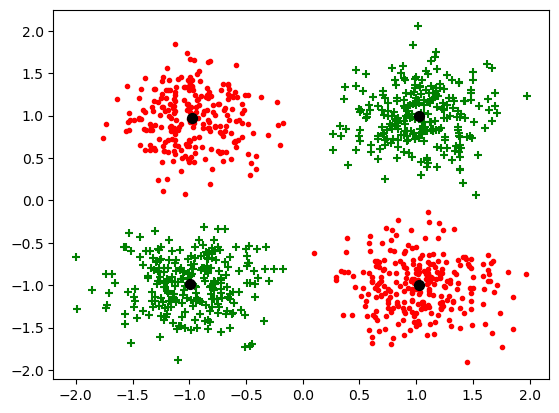

In [86]:
plot_data(X_train, y_train)
plt.scatter(B[:, 0], B[:, 1], s=50, marker='o', c='black')

In [87]:
p = Lineaire(max_iter=1_000, eps=1e-2, projection=proj_gauss, projection_args={'base':B, 'sigma':1})
p.fit(X_train, y_train, X_test, y_test)

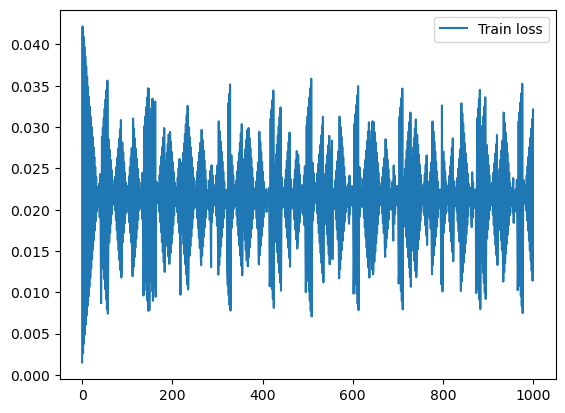

In [88]:
plt.plot(p.loss_values, label='Train loss')
plt.legend()

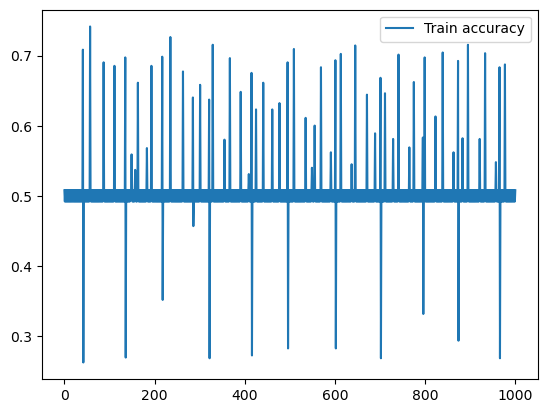

In [89]:
plt.plot(p.accuracy_values, label='Train accuracy')
plt.legend()

In [90]:
print('Accuracy en train :', p.score(X_train, y_train))
print('Accuracy en test :', p.score(X_test, y_test))

Accuracy en train : 0.5080160320641283
Accuracy en test : 0.468
